# Initialize Library and read Data

we use some library to do clustering and analyze the clusters

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# K-Means Clustering
Dokumentasi sklearn.cluster.KMeans:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Beberapa parameter penting yang berhubungan dengan praktikum ini:


*   n_clusters: *int*, banyak cluster atau k
*   init: *{‘k-means++’, ‘random’}*. **'k-means++' parameter** initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization, as shown in the reference. **random** choose n_clusters observations (rows) at random from data for the initial centroids
*   n_init: *‘auto’ or int*. n kali centroid dibangkitkan sebelum dijadikan centroid awal.

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 300, 'n_clusters': 4, 'n_init': 1, 'random_state': None, 'tol': 0.0001, 'verbose': 0}

Hasil KMeans Clustering:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


<Axes: xlabel='X', ylabel='Y'>

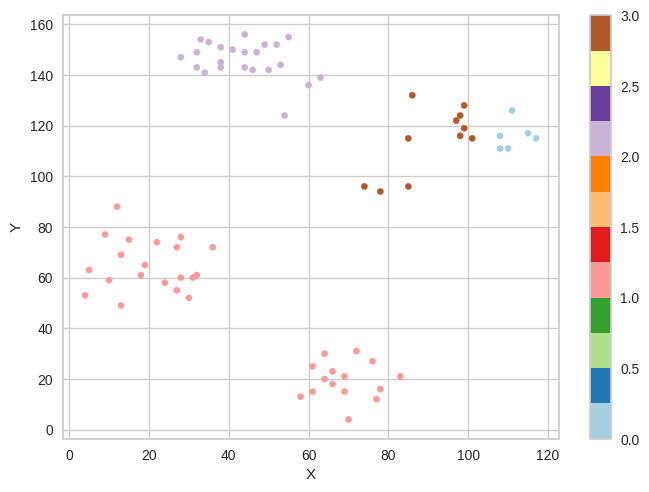

In [ ]:
kmeans=KMeans(n_clusters=4, init="random", n_init=1)
clusters = kmeans.fit_predict(data)

print(kmeans.get_params(deep=False))

print('\nHasil KMeans Clustering:\n', clusters)

data.plot(x='X', y='Y', kind='scatter', c=clusters, colormap='Paired') #only 2D data

## Cluster Analysis (Silhoutte Score)
Dalam analisa cluster yang disediakan oleh library scikit.learn untuk kmeans ada SSE. Analisa paling umum dan banyak digunakan adalah silhoutte score (https://en.wikipedia.org/wiki/Silhouette_(clustering))

The best **Silhoutte Score** value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. Over 0.7 is considered to be "strong", a value over 0.5 "reasonable" and over 0.25 "weak".


Cluster Analysis

SSE (inertia):  49405.830660643696

Silhoutte Score:  0.5345522139133059




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


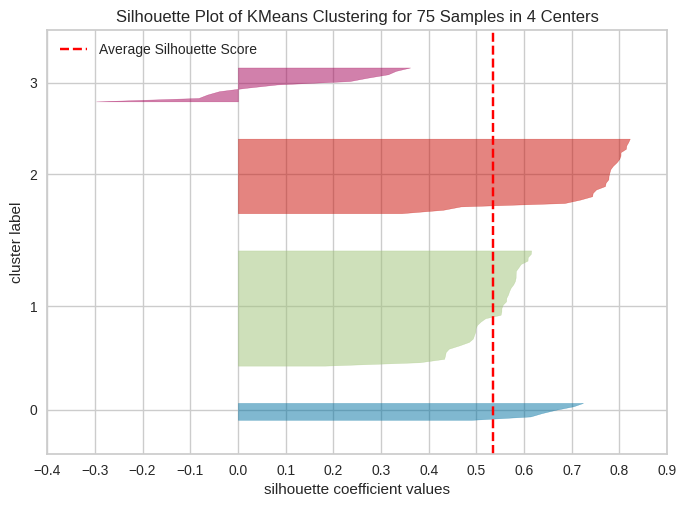

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 75 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
print('\nCluster Analysis\n')
print('SSE (inertia): ', kmeans.inertia_)
print('\nSilhoutte Score: ', silhouette_score(data,clusters))
print('\n')

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') #hanya bisa di KMeans
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Elbow Plot
***Automatic Clustering:*** Istilah ini muncul disaat kita menentukan banyak jumlah klaster secara otomatis. Salah satu metode untuk menentukan klaster mana yang terbaik adalah Elbow Method.

Elbow plot: menentukan jumlah **cluster optimal** dengan menggunakan nilai  within-cluster sum of squares (WCSS).WCSS mengukur sum of squared antara setiap titik data dan pusat clusternya (centroid). Elbow point menunjukan titik dimana tingkat penurunan WCSS mulai mendatar.


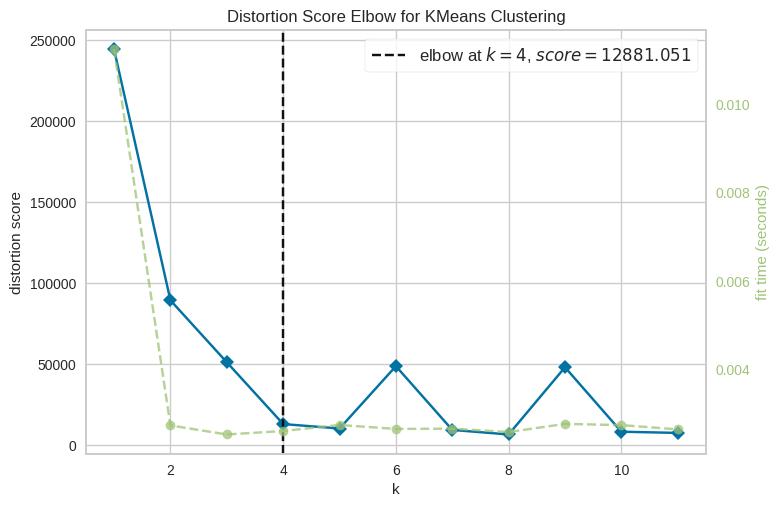

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Hiearchical (Agglomerative) Clustering
Dokumentasi sklearn.cluster.AgglomerativeClustering:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Beberapa parameter penting yang berhubungan dengan praktikum ini:


*   n_clusters: *int*, banyak cluster atau k
*   linkage: *{‘ward’, ‘complete’, ‘average’, ‘single’}*, Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

  1.  ‘ward’ minimizes the variance(the sum of squared differences within all clusters) of the clusters being merged.

  2.  ‘average’ uses the average of the distances of each observation of the two sets.

  3.  ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

  4.  ‘single’ uses the minimum of the distances between all observations of the two sets.

{'affinity': 'deprecated', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'average', 'memory': None, 'metric': None, 'n_clusters': 4}

Hasil Agglomerative Clustering:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


<Axes: xlabel='X', ylabel='Y'>

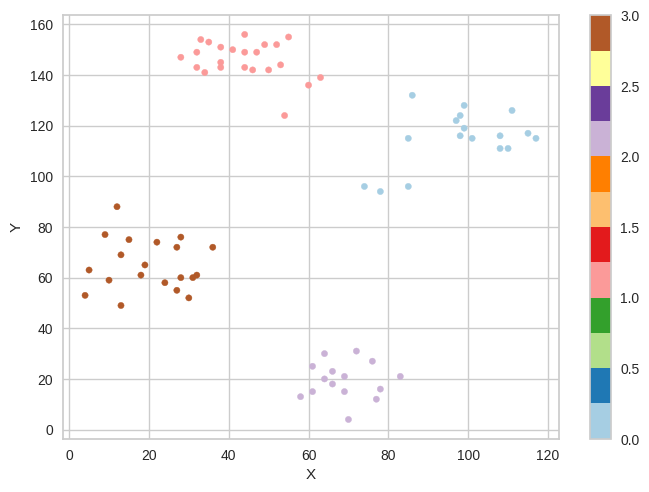

In [ ]:
hclust = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
hclusters = hclust.fit_predict(data)

print(hclust.get_params(deep=False))

print('\nHasil Agglomerative Clustering:\n', hclusters)

data.plot(x='X', y='Y', kind='scatter', c=hclusters, colormap='Paired') #only 2D data

## Cluster Analysis (Silhoutte Score)

In [ ]:
print('\nCluster Analysis')
print('\nSilhoutte Score: ', silhouette_score(data,hclusters))


Cluster Analysis

Silhoutte Score:  0.7376569908806615


## Elbow Plot

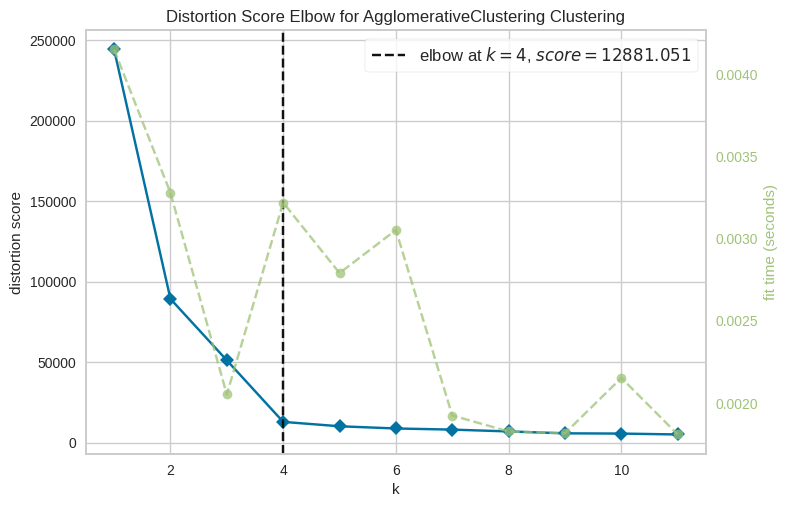

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(hclust, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Tugas (Assignment)

  1. dataset << milk.csv, dan tampilkan
  2. ambil data pada semua atribut, kecuali class
  3. data << normalisasi dengan min-max (0-1)
  4. cluster << lakukan clustering pada data menggunkan K-Means (k=3), sebanyak 10 kali. Setiap kali selesai clustering, lakukan cluster analysis dengan SSE dan Silhoutte Score. Berapa nilai SSE dan Silhoutte Score terbaik dan tampilkan Silhoutte Plotnya!
  5. Berapa nilai k terbaik dari cluster K-Means dengan menggunakan Elbow Plot?
  6. cluster << lakukan clustering pada data dengan menggunakan Single, Average, Complete Linkage dengan k=3. Tampilkan hasil cluster setiap linkage dan algoritma mana yang memiliki nilai Silhoutte score terbaik?
  7. Berapa nilai k terbaik (menggunakan Elbow Plot) dari cluster Hierarchical clustering di Single, Average, dan Complete Linkage?
  8. Berilah kesimpulan mana nilai K dan Algoritma Clustering yang terbaik untuk data milk.csv dan jelaskan alasannya!

In [ ]:
# Dataset milk.csv dan tampilkan
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

dataset = pd.read_csv('milk.csv')
data = dataset.loc[:,['pH','Temprature','Taste','Odor','Fat ','Turbidity','Colour']]
print(data)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]


In [ ]:
min_element_column = np.max(data,0)
max_element_column = np.amin(data,0)
newmin = 0
newmax = 1

data = ((data-min_element_column)*(newmax-newmin)/(max_element_column - min_element_column)) + newmin
print(data)

            pH  Temprature  Taste  Odor  Fat   Turbidity    Colour
0     0.446154    0.982143    0.0   1.0   0.0        1.0  0.066667
1     0.446154    0.964286    1.0   0.0   1.0        0.0  0.133333
2     0.153846    0.357143    0.0   0.0   0.0        0.0  0.600000
3     0.000000    1.000000    0.0   0.0   1.0        0.0  0.000000
4     0.446154    0.946429    1.0   1.0   1.0        1.0  0.000000
...        ...         ...    ...   ...   ...        ...       ...
1054  0.430769    0.803571    0.0   0.0   1.0        1.0  0.533333
1055  0.430769    0.928571    0.0   1.0   0.0        1.0  0.000000
1056  1.000000    0.892857    0.0   0.0   0.0        0.0  0.000000
1057  0.415385    0.839286    0.0   1.0   0.0        1.0  0.333333
1058  0.138462    0.625000    1.0   0.0   0.0        0.0  0.000000

[1059 rows x 7 columns]


Hasil Clustering KMeans:  [1 0 0 ... 0 1 0]

Cluster Analysis

SSE (inertia):  717.0099104434357

Silhoutte Score:  0.30219116989447026




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


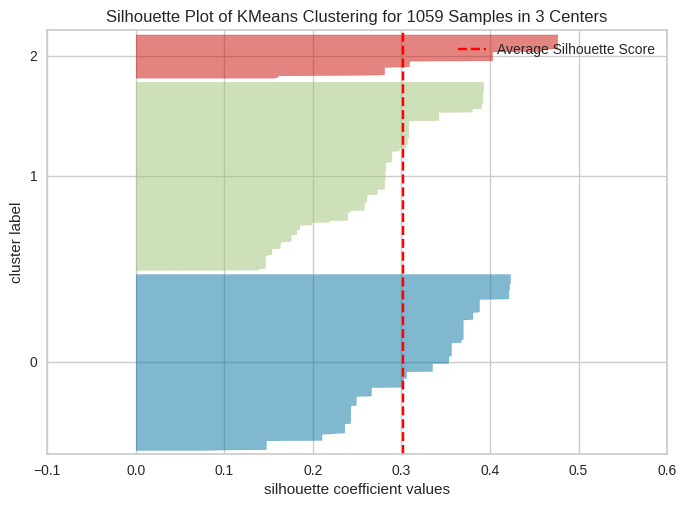

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1059 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=3, init="random", n_init=1)
clusters=kmeans.fit_predict(data)

print('Hasil Clustering KMeans: ', clusters)
print('\nCluster Analysis\n')
print('SSE (inertia): ', kmeans.inertia_)
print('\nSilhoutte Score: ', silhouette_score(data,clusters))
print('\n')

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') #hanya bisa di KMeans
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

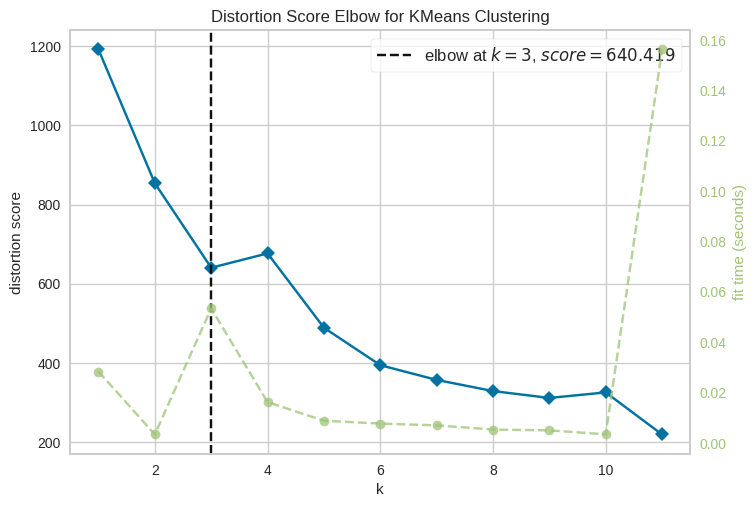

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()


Hasil Agglomerative Clustering:
 [0 0 0 ... 0 0 0]
Cluster Analysis
Silhoutte Score:  -0.01257792980589304


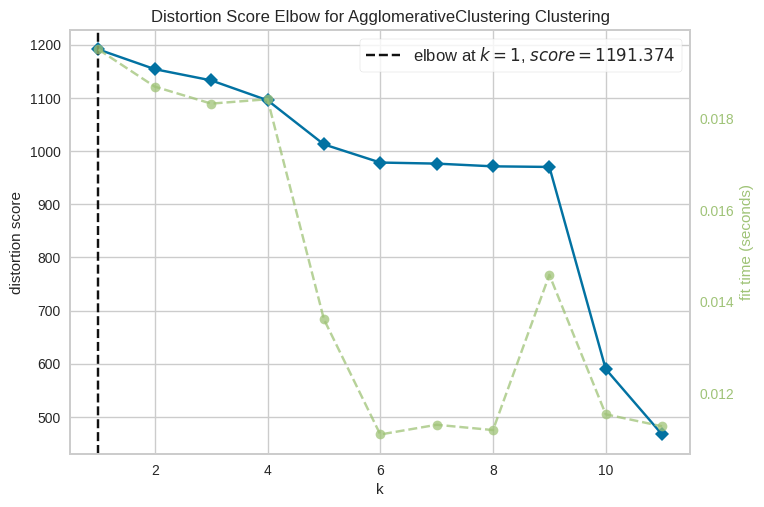

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
hclust = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
hclusters = hclust.fit_predict(data)
print('\nHasil Agglomerative Clustering:\n', hclusters)

print('Cluster Analysis')
print('Silhoutte Score: ', silhouette_score(data,hclusters))

visualizer = KElbowVisualizer(hclust, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


Hasil Agglomerative Clustering:
 [1 0 0 ... 0 1 0]
Cluster Analysis
Silhoutte Score:  0.3402305179065081


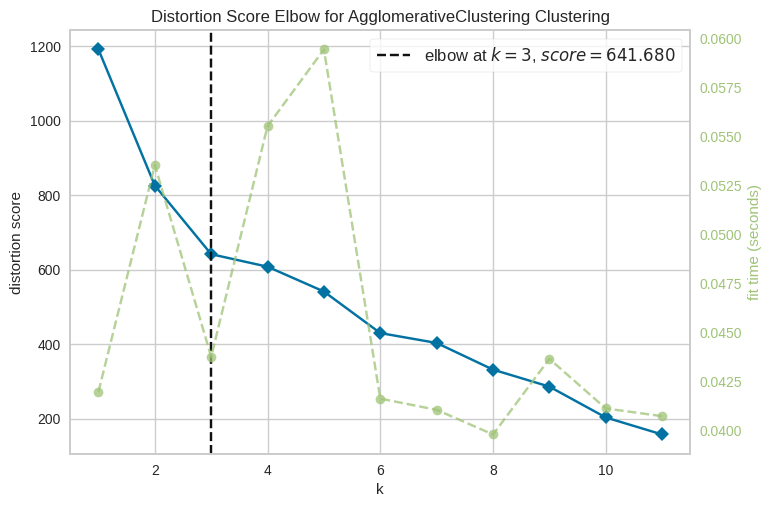

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
hclust = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
hclusters = hclust.fit_predict(data)
print('\nHasil Agglomerative Clustering:\n', hclusters)

print('Cluster Analysis')
print('Silhoutte Score: ', silhouette_score(data,hclusters))

visualizer = KElbowVisualizer(hclust, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


Hasil Agglomerative Clustering:
 [2 1 1 ... 1 2 1]
Cluster Analysis
Silhoutte Score:  0.33643820109030415


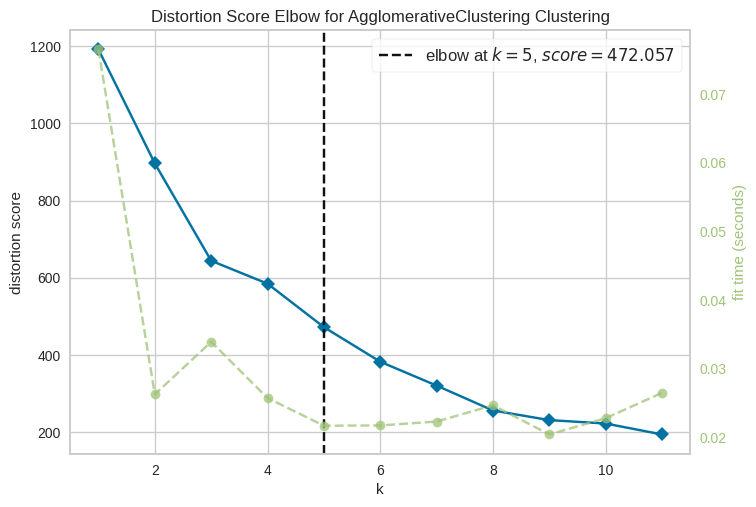

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
hclust = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
hclusters = hclust.fit_predict(data)
print('\nHasil Agglomerative Clustering:\n', hclusters)

print('Cluster Analysis')
print('Silhoutte Score: ', silhouette_score(data,hclusters))

visualizer = KElbowVisualizer(hclust, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure